In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


The label value is  8


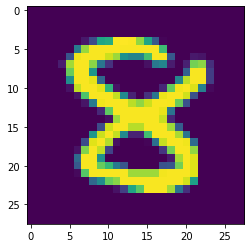

In [4]:
print("The label value is ",y_test[876])
plt.imshow(X_test[876])

The label value is  3


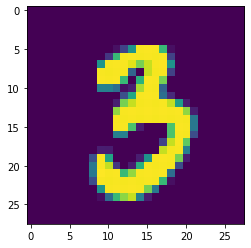

In [5]:
print("The label value is ",y_train[890])
plt.imshow(X_train[890])


In [6]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [7]:
number_of_classes= 10
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [9]:
print("After encoding the value 7 of y_test[987] become", y_test[987])

After encoding the value 7 of y_test[987] become [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [10]:
model= tf.keras.Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer="Adam", metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='accuracy',
                        patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                        patience=3,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5,batch_size=32,callbacks=callback)

Epoch 1/5
1875/1875 [==============================] - 174s 92ms/step - loss: 0.2720 - accuracy: 0.9501 - val_loss: 0.0904 - val_accuracy: 0.9721 - lr: 0.0010
Epoch 2/5
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0716 - accuracy: 0.9785 - val_loss: 0.0762 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 3/5
1875/1875 [==============================] - 164s 88ms/step - loss: 0.0519 - accuracy: 0.9835 - val_loss: 0.0739 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 4/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0938 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 5/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.1025 - val_accuracy: 0.9786 - lr: 0.0010


In [14]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("loss & accuracy")
print(metrics)



loss & accuracy
[0.1024920791387558, 0.978600025177002]


In [15]:
prediction=model.predict(X_test[:4])
print(np.argmax(prediction,axis=1))
print(y_test[:4])

1/1 [==============================] - 0s 150ms/step
[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save('digit-recognition.h5')

In [17]:
!tar -zcvf digit-recognition.tar digit-recognition.h5


digit-recognition.h5


In [18]:
!pip install ibm_watson_machine_learning
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 23.5 MB/s 
     |████████████████████████████████| 51 kB 830 kB/s 
     |████████████████████████████████| 824 kB 53.2 MB/s 
     |████████████████████████████████| 133 kB 58.5 MB/s 
     |████████████████████████████████| 547 kB 55.1 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=6fe470e9346dcdf1d7870573a57c367daef0806ff5693975b783f5bea1269da1
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=8e9cc5057aca10c9cdcbf266e3a7c13880e171f0d5a8159ff24db0baeb15d462
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [2]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"Y2LPOJV6M3HgkU6Wc8a3k_kuSnUqTJR172Scc2ol1oTB"
}
client = APIClient(credentials)
client

In [3]:
client.spaces.get_details()

{'resources': []}

In [21]:
def guid_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [22]:
space_uid = guid_space_name(client,'IBM - PNT 2022TMID33418')
space_uid

'2b4eb3b8-bf93-4465-80d1-6d2f3fa74986'

In [23]:
client.set.default_space(space_uid)

'SUCCESS'

In [24]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [25]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [26]:
model_details = client.repository.store_model(model='digit-recognition.tar',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model repo",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [27]:
model_details


{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T19:20:43.378Z',
  'id': 'c74c0a55-84da-4d94-aa37-b320ea7c9e8f',
  'modified_at': '2022-11-19T19:20:46.861Z',
  'name': 'CNN Digit recognition model repo',
  'owner': 'IBMid-6640044ANA',
  'resource_key': '15b9594c-e056-4279-b9d8-a20bbec17122',
  'space_id': '2b4eb3b8-bf93-4465-80d1-6d2f3fa74986'},
 'system': {'warnings': []}}

In [28]:
model_id = client.repository.get_model_id(model_details)
model_id

'c74c0a55-84da-4d94-aa37-b320ea7c9e8f'

In [29]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/content/DigitRecog_IBM_model.tar.gz'